<a href="https://colab.research.google.com/github/leogalbu/Colab_Notebook/blob/Image_Classification/Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recupero il dataset

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-26 13:40:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  76.7MB/s    in 1.4s    

2022-08-26 13:40:53 (76.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [4]:
!ls pizza_steak

test  train


In [6]:
!ls pizza_steak/train/

pizza  steak


In [8]:
#!ls pizza_steak/train/steak

In [8]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are  {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are  2 directories and 0 images in 'pizza_steak'.
There are  2 directories and 0 images in 'pizza_steak/train'.
There are  0 directories and 750 images in 'pizza_steak/train/steak'.
There are  0 directories and 750 images in 'pizza_steak/train/pizza'.
There are  2 directories and 0 images in 'pizza_steak/test'.
There are  0 directories and 250 images in 'pizza_steak/test/steak'.
There are  0 directories and 250 images in 'pizza_steak/test/pizza'.


In [12]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [5]:
# Get the classnames

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
print(data_dir.glob('*'))
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

<generator object Path.glob at 0x7f7221855dd0>
['pizza' 'steak']


In [6]:
# Visualize Images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory
  target_folder = target_dir + "/" + target_class
  # get random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read and plot the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['976382.jpg']
Image shape: (512, 512, 3)


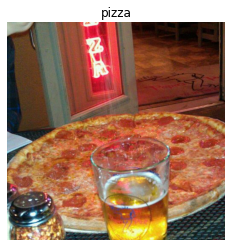

In [9]:
img = view_random_image("pizza_steak/train", "pizza")

['482022.jpg']
Image shape: (512, 512, 3)


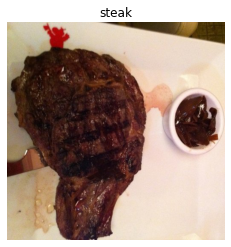

In [32]:
img = view_random_image("pizza_steak/train", "steak")

In [34]:
# View the image shape

img.shape # width height, colour channels

(512, 512, 3)

# End to end CNN

In [11]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing data (Normalize pixel value tra 0 e 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32,target_size=(224,224), class_mode="binary", seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32,target_size=(224,224), class_mode="binary", seed=42)

# Build the CNN Model (Tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
)

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch = len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 208ms/step - loss: 0.5462 - accuracy: 0.7173 - val_loss: 0.4463 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4163 - accuracy: 0.8173 - val_loss: 0.3371 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3823 - accuracy: 0.8400 - val_loss: 0.3758 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3673 - accuracy: 0.8447 - val_loss: 0.3051 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3273 - accuracy: 0.8640 - val_loss: 0.3747 - val_accuracy: 0.8220
